# Explore DRAGON results

In [162]:
%matplotlib ipympl
from matplotlib import pyplot as plt
from matplotlib import colors
import numpy as np
from astropy.io import fits
from astropy.table import Table
import os

# 1. Choose a model to explore

In [2]:
model = 'run_2D_DM'

# 2. Injection spectra

In [152]:
hdulist = fits.open(os.path.join('output', f'{model}.fits.gz'))
#hdulist.info()

In [153]:
h = hdulist[0].header
h

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    3 / number of data axes                            
NAXIS1  =                   56 / length of data axis 1                          
NAXIS2  =                   41 / length of data axis 2                          
NAXIS3  =                   81 / length of data axis 3                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
RMIN    =                   0.                                                  
RMAX    =                  12.                                                  
ZMIN    =                  -4.                                                  
ZMAX    =                   

In [183]:
grid_E = np.logspace(np.log10(h['EKMIN']), np.log10(h['EKMAX']), h['NAXIS1'])
grid_R = np.linspace(h['RMIN'], h['RMAX'], h['NAXIS2'])
grid_z = np.linspace(h['ZMIN'], h['ZMAX'], h['NAXIS3'])
grid_E, grid_R, grid_z

(array([1.00000000e-01, 1.18229887e-01, 1.39783061e-01, 1.65265354e-01,
        1.95393040e-01, 2.31012970e-01, 2.73126372e-01, 3.22917000e-01,
        3.81784403e-01, 4.51383266e-01, 5.33669923e-01, 6.30957344e-01,
        7.45980152e-01, 8.81971488e-01, 1.04275389e+00, 1.23284674e+00,
        1.45759330e+00, 1.72331091e+00, 2.03746853e+00, 2.40889673e+00,
        2.84803587e+00, 3.36722958e+00, 3.98107171e+00, 4.70681656e+00,
        5.56486388e+00, 6.57933225e+00, 7.77873705e+00, 9.19679199e+00,
        1.08733567e+01, 1.28555573e+01, 1.51991108e+01, 1.79698915e+01,
        2.12457823e+01, 2.51188643e+01, 2.96980048e+01, 3.51119173e+01,
        4.15127800e+01, 4.90805127e+01, 5.80278345e+01, 6.86062429e+01,
        8.11130831e+01, 9.58999061e+01, 1.13382350e+02, 1.34051824e+02,
        1.58489319e+02, 1.87381742e+02, 2.21541221e+02, 2.61927934e+02,
        3.09677100e+02, 3.66130884e+02, 4.32876128e+02, 5.11788955e+02,
        6.05087501e+02, 7.15394265e+02, 8.45809828e+02, 1.000000

In [159]:
hdu_table = Table(names=['Z', 'A', 'SEC', 'DM', 'EXTRA'], dtype=[int, int, int, int, int])
for hdu in hdulist[1:]:
    hdu_table.add_row([hdu.header['Z_'], hdu.header['A'], hdu.header['SEC'], hdu.header['DM'], hdu.header['EXTRA']])


In [160]:
particle_names = {
    'Z=-1, A=0': r'e$^-$',
    'Z=1, A=0': r'e$^+$',
    'Z=-1, A=1': r'$\bar p$',
    'Z=1, A=1': r'p',
}

spectra = {}
for i, hdu in enumerate(hdulist[1:]):
    if hdu.header['SEC']:
        origin = "secondary"
    elif hdu.header['DM']:
        origin = "DM"
    elif hdu.header['EXTRA']:
        origin = "extra"
    else:
        origin = "primary"
    particle = f"Z={hdu.header['Z_']}, A={hdu.header['A']}"
    spectra[f'{origin} {particle_names.get(particle, particle)}'] = hdu.data


55
0.0 1.5452802371029861e-09


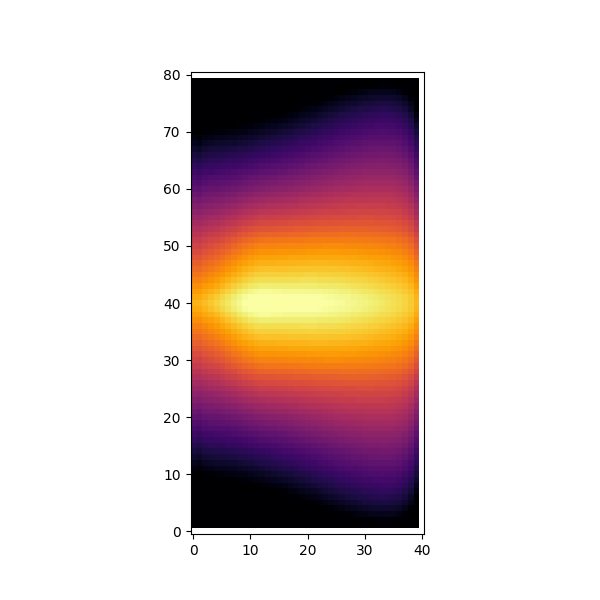

In [192]:
def plot_map(species, E, ax):
    energy = np.searchsorted(grid_E, E)
    print(energy)
    data = spectra[species][:, :, energy]
    p1, p99 = np.nanpercentile(data, [1, 99])
    print(p1, p99)
    ax.imshow(data,
              #extent=(grid_R[0], grid_R[-1], grid_z[0], grid_z[-1]),
              origin='lower', interpolation='nearest',
              cmap='inferno',
              norm=colors.LogNorm(vmin=max(p1, 1e-4*p99), vmax=p99),
             )


fig_name='map'
plt.close(fig_name)
fig = plt.figure(fig_name, figsize=(6, 6))
axes = fig.subplots(nrows=1, ncols=1, squeeze=False,
                    sharex='col', sharey=True,
                    gridspec_kw={'hspace': 0, 'wspace': 0}
                   )

plot_map(r'primary e$^-$', 1000, axes[0, 0])

In [177]:
data = spectra['primary e$^-$']

In [193]:
data[:, :, 55].shape

(81, 41)